In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datetime import timedelta
from timeit import default_timer as timer
from math import sqrt

## Images reading&resizing

In [2]:
img_l = np.asanyarray(Image.open("i1.jpg").resize((400,300), Image.BICUBIC).convert("RGB")).astype(np.int)
img_r = np.asanyarray(Image.open("i2.jpg").resize((400,300), Image.BICUBIC).convert("RGB")).astype(np.int)

## Params definition

In [7]:
kg_max=45
kv_max=14
kv_half = kv_max//2
height = img_r.shape[0]
length = img_r.shape[1]

In [13]:
#import shelve

In [14]:
#with shelve.open("lab2.db") as db:
    #db["img_shift2"] = img_shift2
    #img_shift2 = db["img_shift2"]

In [16]:
#np.save("img_shift.npy", img_shift2)

In [18]:
img_shift2 = np.load("img_shift.npy")

# lab2 start

https://staff.fnwi.uva.nl/l.dorst/hz/chap11_13.pdf

In [23]:
from random import choices
from scipy.linalg import null_space

In [24]:
pairs = []
# (X, X')
for y in range(30, img_r.shape[0] - 30):
    for x in range(30, img_r.shape[1] - 30):
        x_norm = [x, y, 1]
        dot_shift = img_shift2[y, x]
        x2 = int(x + dot_shift[0])
        y2 = int(y + dot_shift[1] - kv_half)
        x_strich = [x2, y2, 1]
        pairs.append([x_norm, x_strich])

In [ ]:
Boundary = 0.001
bestF = None
bestScore = 0
for iteration in range(1000):
    print(iteration, end=" ")
    seven_pairs = choices(pairs, k=7)
    X_big = []
    for a,b in seven_pairs:
        x1, y1, z1 = a
        x2, y2, z2 = b
        X_big.append([x2*x1, x2*y1, x2*z1, y2*x1, y2*y1, y2*z1, z2*x1, z2*y1, z2*z1])
        # на попередній лінії була помилка,
        # через яку я декілька тижнів не міг зрозуміти чого не працює.
        # вічна пам'ять моїм загиблим нервовим клітинам.
        # F
    X_big = np.array(X_big)
    null_vectors = null_space(X_big)
    f1 = null_vectors[:,0].reshape((3,3))
    f2 = null_vectors[:,1].reshape((3,3))
    
    p = np.array([np.linalg.det(f2),
     np.linalg.det(f2)*np.trace(np.dot(np.linalg.inv(f2), f1)),
     np.linalg.det(f1)*np.trace(np.dot(np.linalg.inv(f1), f2)),
     np.linalg.det(f2),
    ])
    coefs = np.roots(p)
    for i in coefs[:1]:
        if np.iscomplex(i):
            continue
        F = f1+i*f2
        # both matrix have zero det
        score = 0
        for a,b in pairs:
            if np.dot(b, np.dot(f1, a)) < Boundary:
                score += 1
        if score > bestScore:
            bestScore = score
            bestF = F.copy()

## Фундаментальна матриця

In [62]:
np.round(bestF, 1)

array([[-0. , -0. ,  0.2],
       [ 0. , -0. , -0.6],
       [-0.2,  0.7, -7. ]])

In [63]:
bestF

array([[-2.96469481e-05, -9.06280014e-04,  1.96475105e-01],
       [ 8.69108889e-04, -4.17490278e-04, -6.34268682e-01],
       [-1.76625568e-01,  7.32325691e-01, -7.03231058e+00]])

In [20]:
#np.save("bestF.npy", bestF)
#np.save("bestScore.npy", bestScore)

In [21]:
bestF = np.load("bestF.npy")
bestScore = np.load("bestScore.npy")

In [19]:
#with shelve.open("lab2.db") as db:
#    #db["bestF"] = bestF
#    #db["bestScore"] = bestScore
#    bestF = db["bestF"]
#    bestScore = db["bestScore"]
#    #img_shift2 = db["img_shift2"]

## Відсоток точок, які задовольняють умову до фундаментальної матриці

In [25]:
print(round(100*bestScore/len(pairs), 2),"%")

86.25 %


## Епіполярна точка у 3-х координатах

In [65]:
epipole = null_space(bestF, 1e-3)
epipole = epipole/epipole[-1]
epipole

array([[824.20004929],
       [208.38691118],
       [  1.        ]])

In [66]:
np.linalg.det(bestF)

-1.0362934568287191e-05

In [67]:
epipole_strich = [epipole[0,0], epipole[1,0]]

## Епіполярна точка

In [68]:
print("X:", epipole_strich[0])
print("Y:", epipole_strich[1])

X: 824.2000492923986
Y: 208.38691117587396


## Ліве зображення

In [69]:
from PIL import ImageDraw

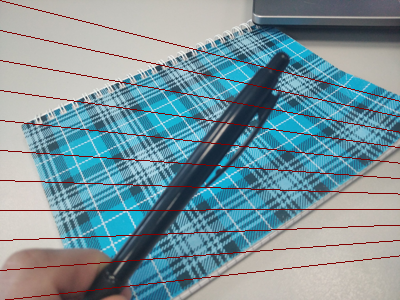

In [70]:
image2show = Image.open("i1.jpg").resize((400,300), Image.BICUBIC).convert("RGB")
draw = ImageDraw.Draw(image2show)
for i in range(11):
    draw.line((0, i*30, epipole_strich[0], epipole_strich[1]), fill=128)
image2show

## Праве зображення

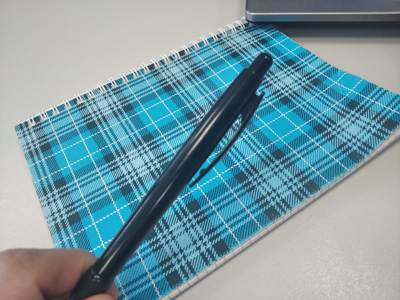

In [71]:
Image.open("i2.jpg").resize((400,300), Image.BICUBIC).convert("RGB")